In [48]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils, to_categorical
from keras.datasets import mnist
from keras import backend as K

In [49]:
%matplotlib inline
np.random.seed(411)

In [50]:
# Load pre-shuffled MNIST data into train and test sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [51]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [52]:
from keras.utils import to_categorical
 
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# find the unique numbers from the train labels
classes = np.unique(train_labels)
num_classes = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Ground Truth : 7')

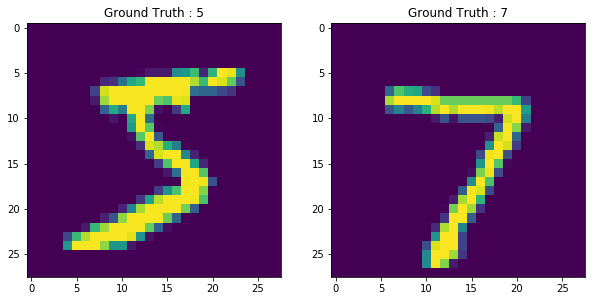

In [53]:
plt.figure(figsize=[10,5])
 
# display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:])
plt.title("Ground Truth : {}".format(train_labels[0]))
 
# display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:])
plt.title("Ground Truth : {}".format(test_labels[0]))

In [54]:
# change from matrix to array of dimension 28x28 to array of dimention 784
dim_data = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dim_data)
test_data = test_images.reshape(test_images.shape[0], dim_data)

In [55]:
# change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [56]:
# change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[6])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[6])

Original label 0 :  1
After conversion to categorical ( one-hot ) :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


## Build Model

#### Traditional Neural Network

In [57]:
model = Sequential()

In [58]:
model.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

In [59]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [84]:
train_data.shape, train_labels_one_hot.shape

((60000, 784), (60000, 10))

In [62]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=True, 
                    validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.0221 - acc: 0.9930 - val_loss: 0.0685 - val_acc: 0.9795
Epoch 2/20
60000/60000 [==============================] - 12s 196us/step - loss: 0.0160 - acc: 0.9950 - val_loss: 0.0702 - val_acc: 0.9806
Epoch 3/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.0163 - acc: 0.9952 - val_loss: 0.0762 - val_acc: 0.9797
Epoch 4/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.0107 - acc: 0.9967 - val_loss: 0.0691 - val_acc: 0.9823
Epoch 5/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0114 - acc: 0.9960 - val_loss: 0.0851 - val_acc: 0.9791
Epoch 6/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0110 - acc: 0.9962 - val_loss: 0.0785 - val_acc: 0.9798
Epoch 7/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0094 - acc: 0.9970 - val_loss: 0.0869

In [70]:
score = model.evaluate(test_data, test_labels_one_hot)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 123us/step
Test loss: 0.10637866680614548
Test accuracy: 0.9776


Text(0.5,1,'Loss Curves')

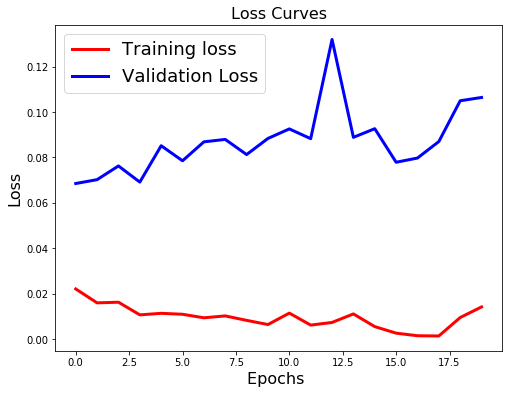

In [74]:
# plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

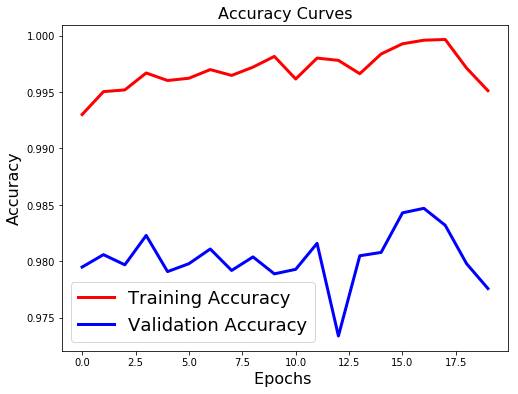

In [75]:
# plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [143]:
model_reg = Sequential()

In [144]:
model_reg.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model_reg.add(Dropout(0.8))
model_reg.add(Dense(512, activation='relu'))
# model_reg.add(Dropout(0.8))
model_reg.add(Dense(nClasses, activation='softmax'))

In [145]:
model_reg.compile(loss='categorical_crossentropy', 
                  optimizer='adam',
                  metrics=['accuracy'])

In [146]:
model_reg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_48 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [147]:
history = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=True, 
                    validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.5235 - acc: 0.8369 - val_loss: 0.1715 - val_acc: 0.9476
Epoch 2/20
60000/60000 [==============================] - 12s 196us/step - loss: 0.2792 - acc: 0.9150 - val_loss: 0.1300 - val_acc: 0.9595
Epoch 3/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.2346 - acc: 0.9282 - val_loss: 0.1216 - val_acc: 0.9634
Epoch 4/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.2084 - acc: 0.9372 - val_loss: 0.1055 - val_acc: 0.9655
Epoch 5/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.1911 - acc: 0.9415 - val_loss: 0.0975 - val_acc: 0.9698
Epoch 6/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.1781 - acc: 0.9454 - val_loss: 0.0917 - val_acc: 0.9713
Epoch 7/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.1715 - acc: 0.9475 - val_loss: 0.09

In [151]:
score = model_reg.evaluate(test_data, test_labels_one_hot)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 142us/step
Test loss: 0.06713621877983678
Test accuracy: 0.9795


Text(0.5,1,'Loss Curves')

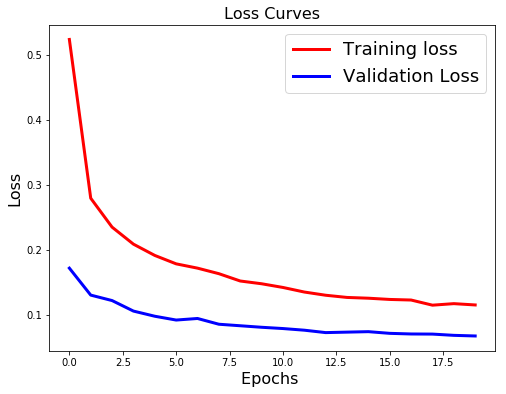

In [152]:
# plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

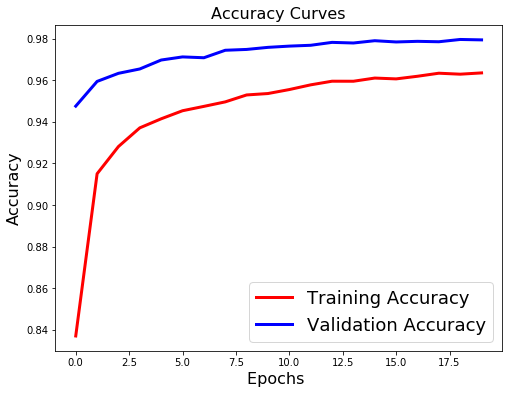

In [153]:
# plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

<hr/>